## Multiple linear regression using Hilbert transform

Written by Abirlal Metya, Panini Dasgupta, Manmeet Singh (25/12/2019)

import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert, chirp
import hilbert_data1_panini_20CRV3_3bpass
import datetime


import statsmodels.api as sm

Read Data

In [2]:
x_train,y_train,_ = hilbert_data1_panini_20CRV3_3bpass.data_hilbert(datetime.datetime(1979,1,1),datetime.datetime(2008,12,31))
x_test2,y_test2,_ = hilbert_data1_panini_20CRV3_3bpass.data_hilbert(datetime.datetime(2009,1,1),datetime.datetime(2015,12,31))
x_test,y_test,_ = hilbert_data1_panini_20CRV3_3bpass.data_hilbert(datetime.datetime(1974,6,1),datetime.datetime(1978,3,16))


In [3]:
x_train.shape,y_train.shape,x_test2.shape,y_test2.shape,x_test.shape,y_test.shape


((10839, 72), (10839, 1), (2437, 72), (2437, 1), (1266, 72), (1266, 1))

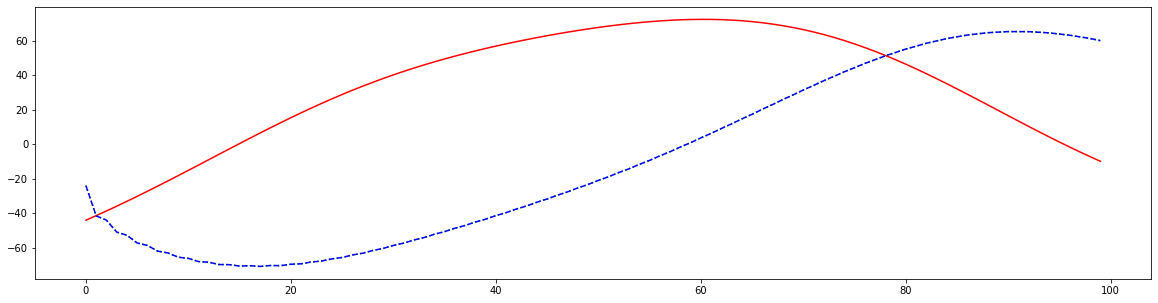

In [4]:
import matplotlib.pyplot as plt#plot the first image in the dataset
from scipy.signal import hilbert
plt.figure(figsize=[20,5])
#plt.imshow(xtrain[1,:,:,0])
plt.plot(np.arange(100),x_train.iloc[0:100,0],'-r')
plt.plot(np.arange(100),np.imag(hilbert(x_train.iloc[:,0])[0:100]),':g')
plt.plot(np.arange(100),x_train.iloc[0:100,12],'--b')

/home/cccr/supriyo/.conda/envs/knp_ai/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


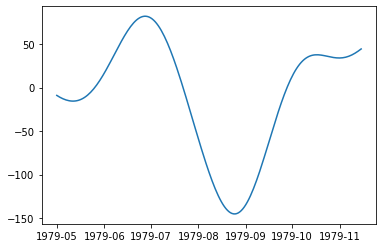

In [5]:
plt.plot(x_train.iloc[1:200,2])

In [6]:
from sklearn import linear_model

In [7]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train.values,y_train.values)

In [8]:
predictions1 = lm.predict(x_test.values)
predictions2 = lm.predict(x_test2.values)


In [9]:
predictions1.shape

(1266, 1)

In [10]:
(lm.score(x_train.values,y_train.values))**0.5

0.8702290396842864

In [11]:
np.corrcoef(predictions1[:,0],y_test.values[:,0])

array([[1.        , 0.85809612],
       [0.85809612, 1.        ]])

In [12]:
np.corrcoef(predictions2[:,0],y_test2.values[:,0])

array([[1.        , 0.82258208],
       [0.82258208, 1.        ]])

Plot different columns

In [13]:
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_train) # make the predictions by the model

# model.summary()

In [14]:
x_test3 = hilbert_data1_panini_20CRV3_3bpass.data_pres(datetime.datetime(1905,1,1),datetime.datetime(2015,12,31))
predictions_test = lm.predict(x_test3.values)
predict_tot = predictions_test#/predictions.std()
rmm1_predict = pd.DataFrame(predict_tot,index=x_test3.index)
rmm1_predict.to_csv('rmm1_MLR_3bpass.txt')

# MLP

## RMM2

In [15]:
x_train,_,y_train = hilbert_data1_panini_20CRV3_3bpass.data_hilbert(datetime.datetime(1979,1,1),datetime.datetime(2008,12,31))
x_test2,_,y_test2 = hilbert_data1_panini_20CRV3_3bpass.data_hilbert(datetime.datetime(2009,1,1),datetime.datetime(2015,12,31))
x_test,_,y_test = hilbert_data1_panini_20CRV3_3bpass.data_hilbert(datetime.datetime(1974,6,1),datetime.datetime(1978,3,16))


In [16]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train.values,y_train.values)

In [17]:
predictions1 = lm.predict(x_test.values)
predictions2 = lm.predict(x_test2.values)

In [18]:
(lm.score(x_train.values,y_train.values))**0.5

0.8690384588475792

In [19]:
np.corrcoef(predictions1[:,0],y_test.values[:,0])

array([[1.        , 0.84018365],
       [0.84018365, 1.        ]])

In [20]:
np.corrcoef(predictions2[:,0],y_test2.values[:,0])

array([[1.        , 0.83972009],
       [0.83972009, 1.        ]])

In [21]:
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_train) # make the predictions by the model

# model.summary()

In [22]:
x_test3 = hilbert_data1_panini_20CRV3_3bpass.data_pres(datetime.datetime(1905,1,1),datetime.datetime(2015,12,31))
predictions_test = lm.predict(x_test3.values)
predict_tot = predictions_test#/predictions.std()
rmm2_predict = pd.DataFrame(predict_tot,index=x_test3.index)
rmm2_predict.to_csv('rmm2_MLR_3bpass.txt')